<a href="https://colab.research.google.com/github/Faheemfemu/Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -**  Retail Sales Prediction : Predicting sales of a major store chain Rossmann 

# **Problem Statement**-
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **Data Description**-
  Rossmann Stores Data.csv - historical data including Sales
 
  store.csv - supplemental information about the stores

**Data fields**

Most of the fields are self-explanatory.

1d -Unique entry id

   store- store_id

sales- sales made for the day

Customers- Footfall for the day

Open- Open or closed

StateHoliday- State Holiday or not

SchoolHoliday-
School Holiday or not

StoreType-
Type of stores

Assortment-
Type of assortment

CompetitionDistance-
Distance from the nearest competition

Promo-
Store running promotion or not

Promo2-
‘Store running consecutive promotion or not



In [1]:
#importing  all relevant libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings    
warnings.filterwarnings('ignore')
from datetime import datetime
%matplotlib inline
# importing all relevant matrics and regression algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading csvfile
filepath1='/content/drive/MyDrive/AlmaBetter/Module 4 Machine Learning/Capstone Project - Supervised ML - Regression/ Rossmann Stores Data.csv'
storepath='/content/drive/MyDrive/AlmaBetter/Module 4 Machine Learning/Capstone Project - Supervised ML - Regression/ store.csv'
rossman_df=pd.read_csv(filepath1)
store_df=pd.read_csv(storepath)


**Data Inspection**

In [4]:
#first look of data
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
rossman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
rossman_df.shape

(1017209, 9)

In [7]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
#checking the null values
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
#check duplicate values
rossman_df.duplicated().sum()

0

In [10]:
#statistical analysis
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [13]:
store_df.shape

(1115, 10)

In [14]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [15]:
#check duplicate values
store_df.duplicated().sum()

0

**Handling Missing Values**

In [16]:
#checking the null values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Text(0.5, 0, 'Competition Distance Distribution Plot')

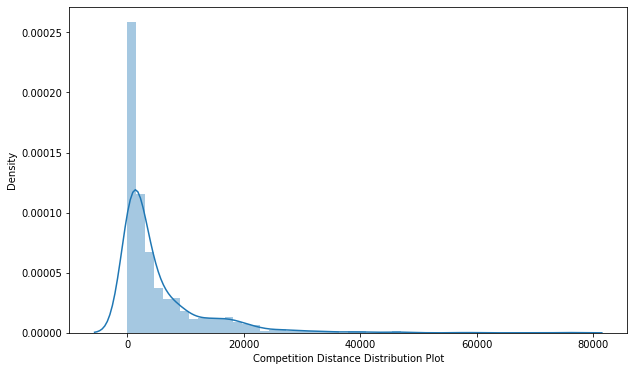

In [17]:
#distribution plot of competition distance
plt.figure(figsize=(10,6))
sns.distplot(x=store_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

The distribution is right skewed, so we'll replace missing values with the median.Median is more robust to outlier effect.

In [18]:
# filling competition distance with the median value
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)
     

In [19]:
store_df['Promo2SinceWeek'].value_counts()

14.0    81
40.0    77
31.0    44
10.0    42
5.0     39
1.0     35
37.0    35
13.0    34
45.0    34
22.0    33
18.0    29
35.0    25
9.0     14
27.0    11
36.0    10
48.0     9
39.0     6
23.0     5
44.0     3
6.0      1
26.0     1
50.0     1
49.0     1
28.0     1
Name: Promo2SinceWeek, dtype: int64

In [20]:
store_df['Promo2SinceYear'].value_counts()

2011.0    128
2013.0    120
2014.0     95
2012.0     81
2009.0     73
2010.0     64
2015.0     10
Name: Promo2SinceYear, dtype: int64

In [21]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [22]:
# imputing the nan values of promo2 related columns with 0
store_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_df['Promo2SinceYear'].fillna(value=0,inplace=True)
store_df['PromoInterval'].fillna(value=0,inplace=True)

In [23]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [24]:
#merging datasets
df=pd.merge(rossman_df,store_df,how='left',on='Store')

In [25]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [26]:
df.shape

(1017209, 18)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [28]:
#statistical Analysis of dataset
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [29]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
     


In [30]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [31]:
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

In [32]:
#creating features from the date

df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)
df['WeekOfYear'] =df['Date'].apply(lambda x: x.weekofyear)
years = df['Year'].unique()

In [33]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,31


# **Exploratory Data Analysis**

**Hypotheses**

Just by observing the head of the dataset and understanding the features involved in it, the following hypotheses could be framed:

* There's a feature called "DayOfWeek" with the values 1-7 denoting each day
of the week.There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.

* Customers would have a positive correlation with Sales.

* The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.

* Promotion should be having a positive correlation with Sales.

* Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.

* Stores are influenced by seasonality, probably before holidays sales would be high.

Next step is to explore and see in a data driven way about the factors influencing Rossmann stores sales and how.

**Categorical Features:**

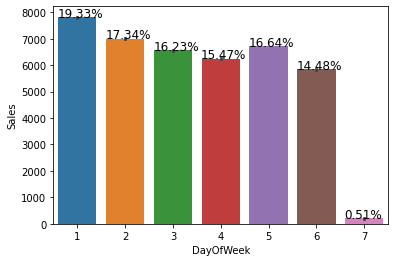

<Figure size 720x576 with 0 Axes>

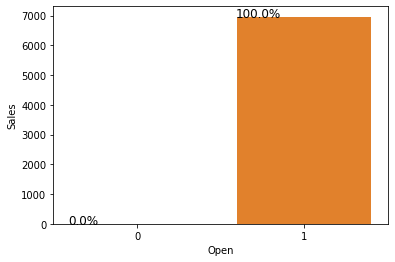

<Figure size 720x576 with 0 Axes>

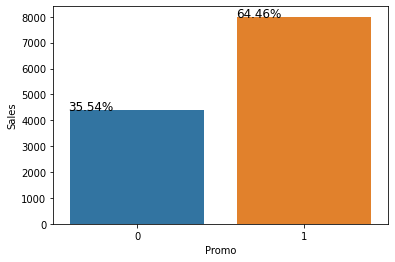

<Figure size 720x576 with 0 Axes>

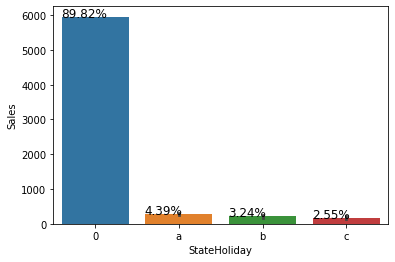

<Figure size 720x576 with 0 Axes>

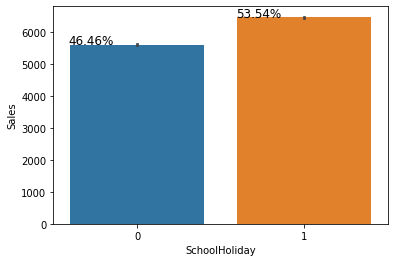

<Figure size 720x576 with 0 Axes>

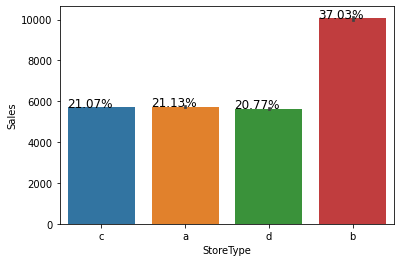

<Figure size 720x576 with 0 Axes>

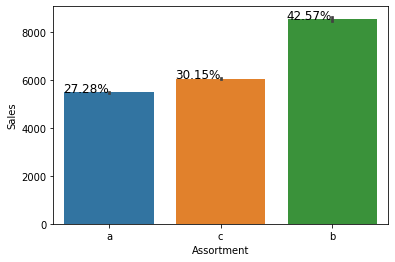

<Figure size 720x576 with 0 Axes>

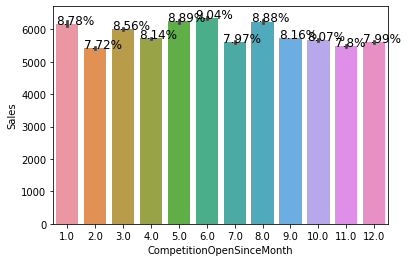

<Figure size 720x576 with 0 Axes>

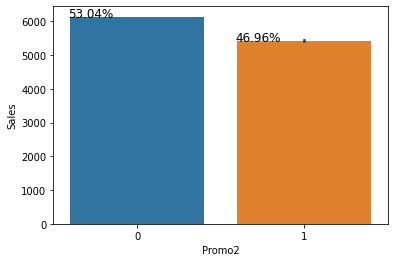

<Figure size 720x576 with 0 Axes>

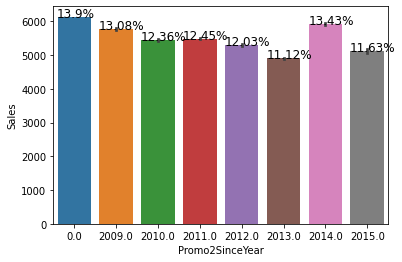

<Figure size 720x576 with 0 Axes>

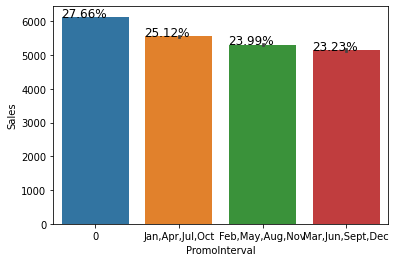

<Figure size 720x576 with 0 Axes>

In [34]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales']) 
  plt.figure(figsize=(10,8))
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()
     

**Observation:**

* There were more sales on Monday, probably because shops generally remain closed on Sundays.
* It could be seen that the Promo leads to more sales.
* Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
* On an average Store type B had the highest sales.
* Highest average sales were seen with Assortment levels-b which is 'extra'.
* With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

<Axes: xlabel='Open', ylabel='Sales'>

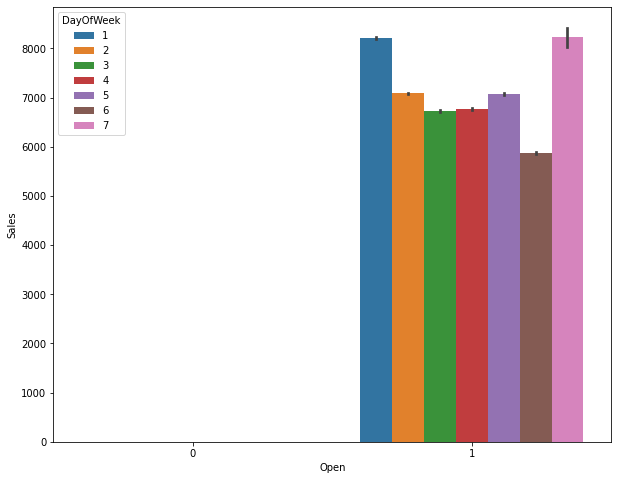

In [35]:
# open and storetype relationship 
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
plt.figure(figsize=(10,8))
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

<Axes: xlabel='Open', ylabel='count'>

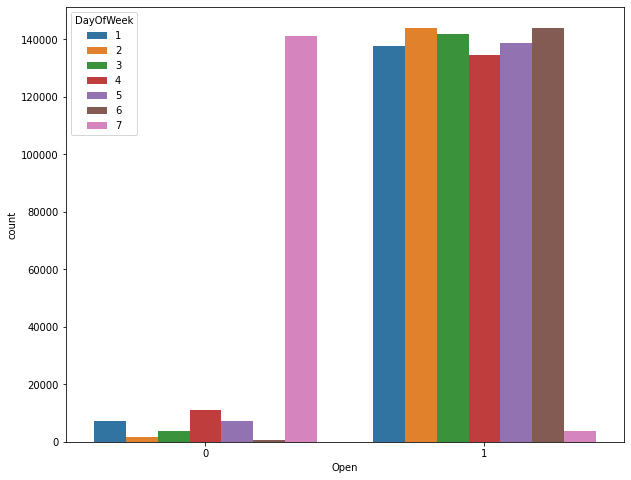

In [36]:
#Lets see open, how many shops are open on which days 
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
plt.figure(figsize=(10,8))
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

**Observation:**

* This is a count plot of open shops according to the day of the week. It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays.

<Axes: xlabel='StoreType', ylabel='Sales'>

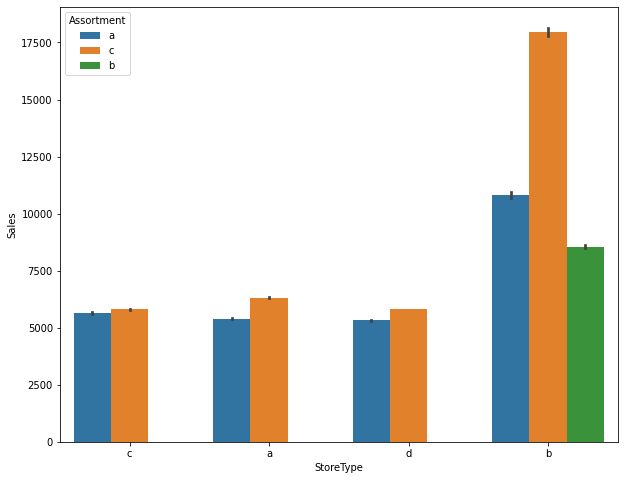

In [37]:
#Let's check the relationship between store type, assortment levels and sales
plt.figure(figsize=(10,8))
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

**Observation:**

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

In [38]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


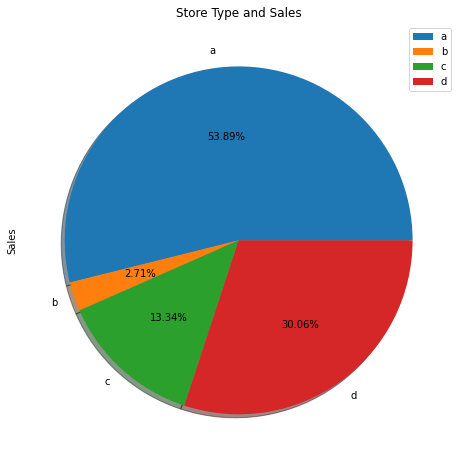

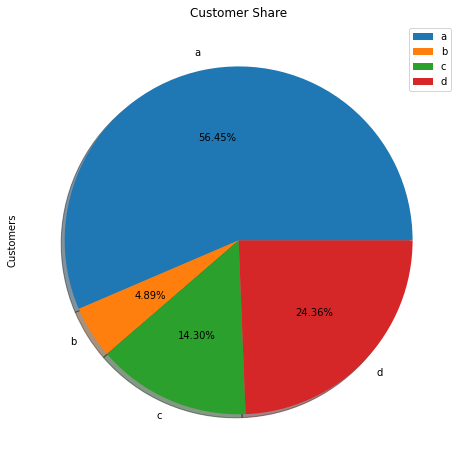

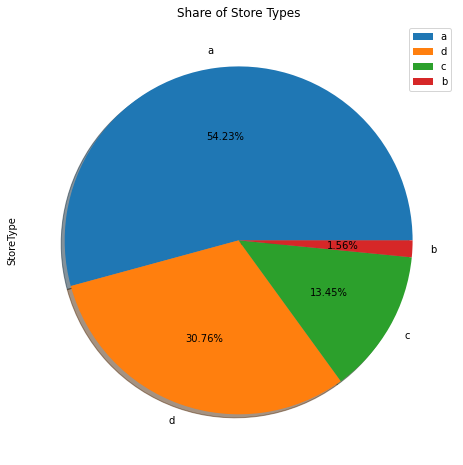

In [39]:
#let's explore store type a bit and it's influence on sales
plt.figure(figsize=(10,8))
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.2f%%', shadow=True)
plt.show()
#customers and store type
plt.figure(figsize=(10,8))
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.2f%%', shadow=True)
plt.show()
#store types in all of the dataset
plt.figure(figsize=(10,8))
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.2f%%', shadow=True)
plt.show()

**Observation:**

* A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.
* But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
* Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

**Sales with Time**

In [40]:
years

array([2015, 2014, 2013])

In [41]:
#sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]

In [42]:
#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

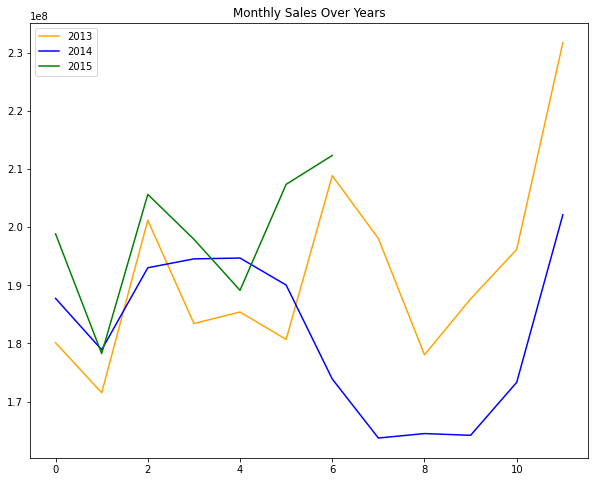

In [43]:
#plotting
plt.figure(figsize=(10,8))
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

**Observation:**
Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

<Axes: xlabel='Customers', ylabel='Sales'>

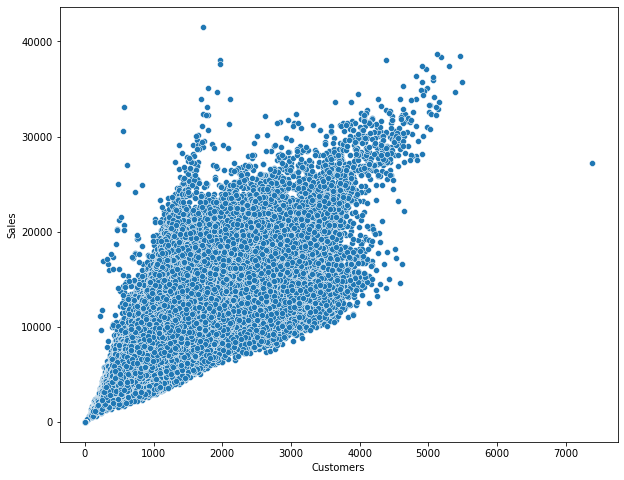

In [44]:
#scatterplot of Customers and Sales
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Customers'], y=df['Sales'])

**Observation:**

Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

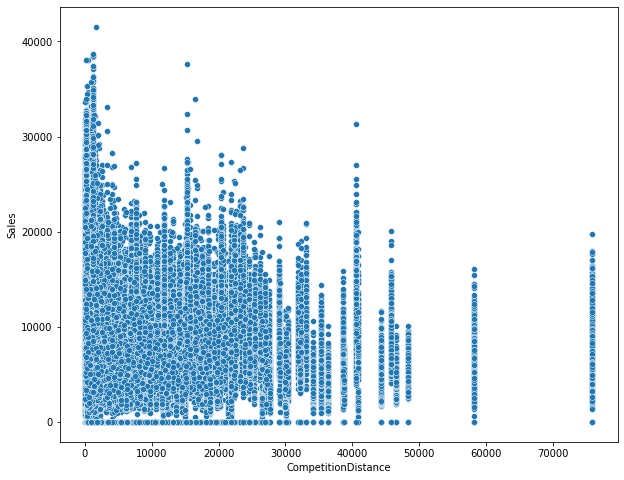

In [45]:
#scatterplot of Competition Distance and Sales
plt.figure(figsize=(10,8))

sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

**Observation:**

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

<Axes: ylabel='Density'>

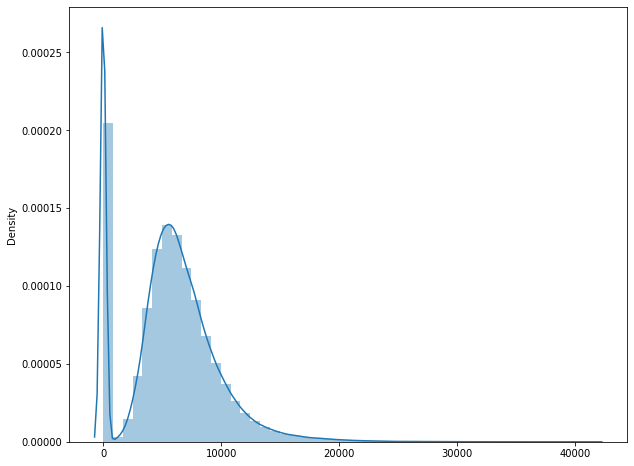

In [46]:
#distribution plot of Sales, as expected positively skewed
plt.figure(figsize=(10,8))
sns.distplot(x=df['Sales'])

**Observation:**

The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

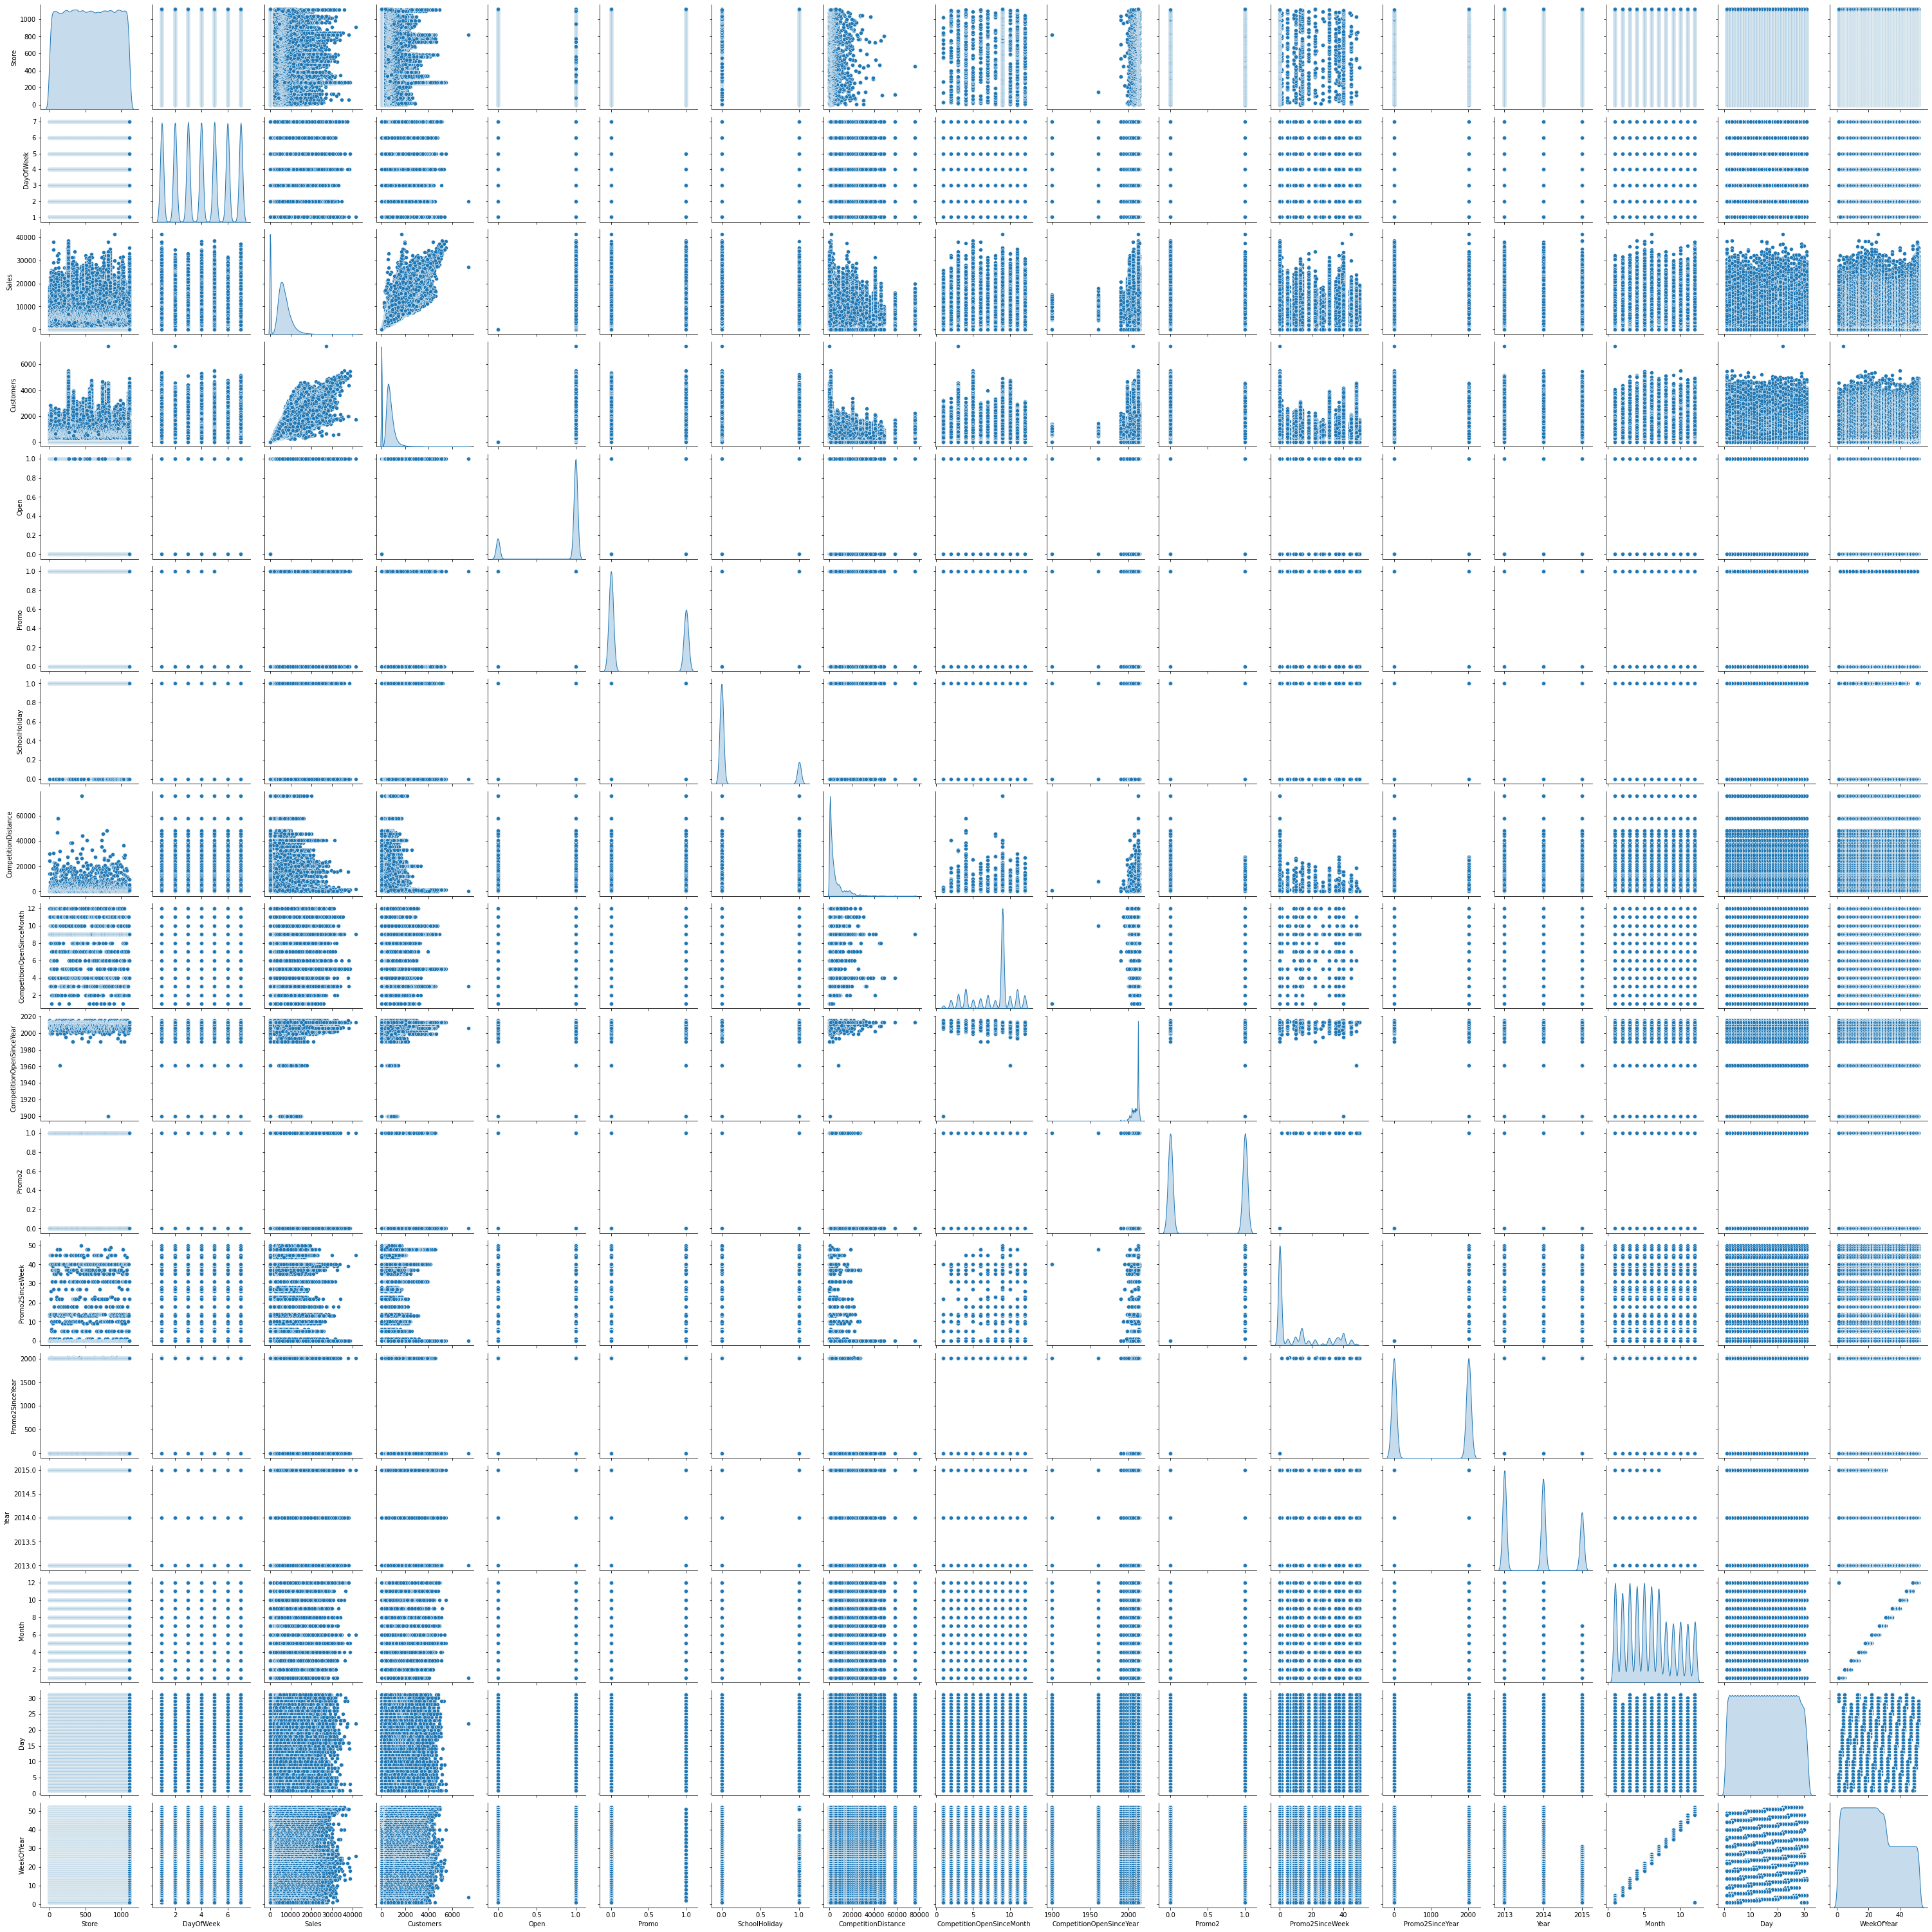

In [ ]:
sns.pairplot(df,diag_kind='kde')

**Correlation Matrix**

In [47]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'Day','Month']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

<Axes: >

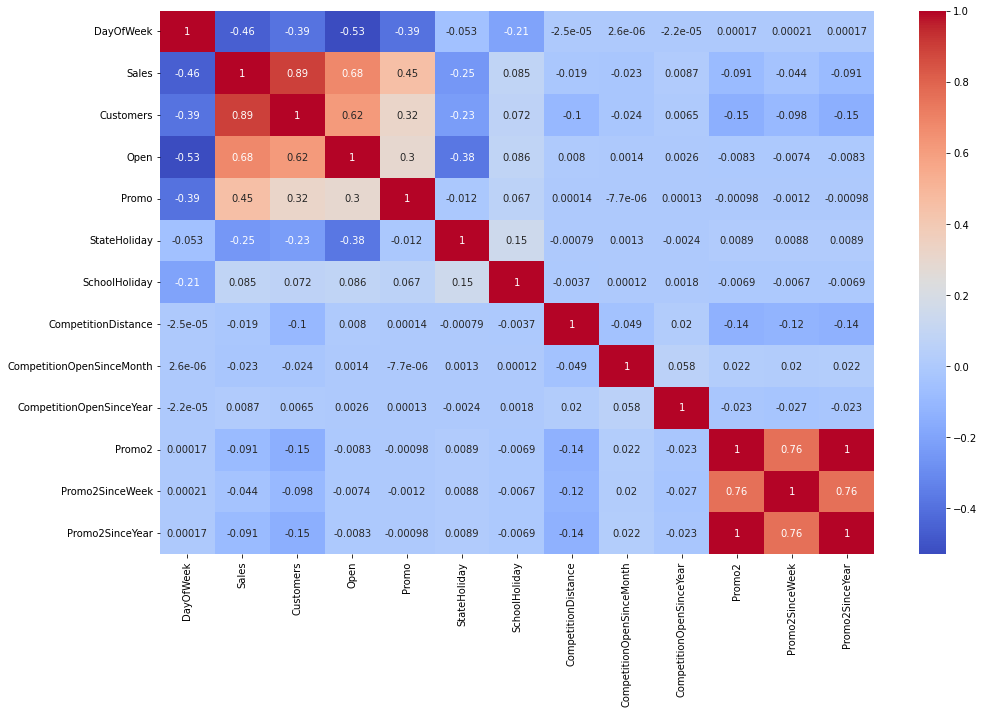

In [48]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

**Observation:**

* Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
* State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
* CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
* There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
* The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

**EDA Conclusions and Hypotheses Validation:**

* There's a positive correlation between customers and sales which is explanatory.

* Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.

* The positive effect of promotion on Customers and Sales is observable.

* It is clear that most of the stores remain closed during State and School Holidays.

But it is important to note that more stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

* Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the stores were of these kinds, they had the best overall revenue numbers. On the other hand, store type b were very few in number and even then they had better average sales than others.

* Earlier, it was observed that only store type b had all three kinds of assortment levels and rest of the store types had two of them. It seems that in some b type stores the products were different as compared to others because the revenue per store is significantly more than the others.

* When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis.

* The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.

* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.

## **Data Manipulation and Feature Selection**

Data manipulation involves manipulating and changing our dataset before feeding it to various machine learning models. This involves keeping important features, outlier treatment, feature scaling and creating dummy variables if necessary.

**Feature Engineering**

In [49]:
#no of observations for closed stores with 0 sales
(df[df.Open == 0]).shape


(172817, 22)

It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. This was also indicated in the barplot of Open vs Sales.

In [50]:
#since the stores closed had 0 sale value; removing the irrelevant part
df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)

In [51]:
# check
df1.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31


<Axes: ylabel='Density'>

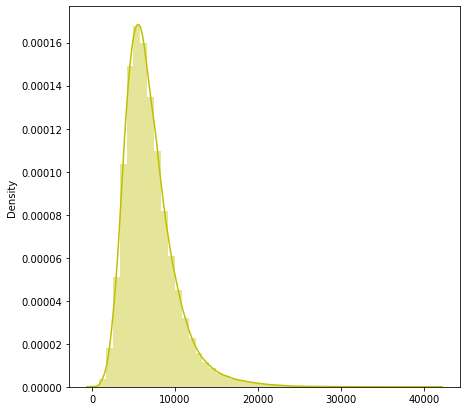

In [52]:
#distribution plot of Sales
plt.figure(figsize=(7,7))
sns.distplot(x=df1['Sales'],color='y')
     

**Ovservation** 
As expected positively skewed

<Axes: xlabel='Sales', ylabel='Density'>

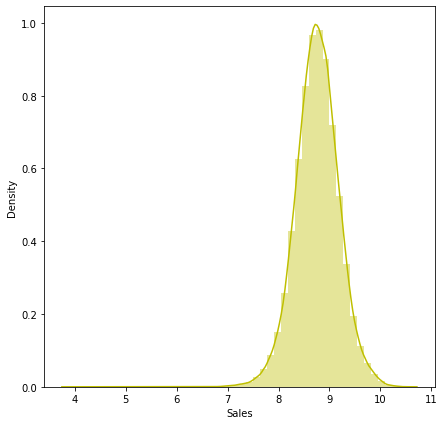

In [53]:
# Dependent variable 'Sales'
plt.figure(figsize=(7,7))
## transformation
df1['Sales'] = np.log(df1['Sales'])
df1.dropna(inplace=True)
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)     
     
sns.distplot((df1['Sales']),color="y")

In [54]:
#changing into boolean 
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)
     

In [55]:
#combining competition open since month and year into total months
df1['CompetitionOpen'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + (df1['Month'] - df1['CompetitionOpenSinceMonth'])
#correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)
     

In [56]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + (df1['WeekOfYear'] - df1['Promo2SinceWeek'])*0.230137

#correcting the neg values
df1['Promo2Open'] = df1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df1['Promo2']

#creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

#Applying 
df1['Promo2running'] = df1.apply(promo2running,axis=1)*df1['Promo2']

#Dropping unecessary columns
df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)
     


In [57]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,Promo2running
0,1,5,2015-07-31,8.568456,555,1,0,1,c,a,1270.0,0,2015,7,31,31,82.0,0.000000,0
1,2,5,2015-07-31,8.710125,625,1,0,1,a,a,570.0,1,2015,7,31,31,92.0,64.142466,1
2,3,5,2015-07-31,9.025696,821,1,0,1,a,a,14130.0,1,2015,7,31,31,103.0,51.912329,1
3,4,5,2015-07-31,9.546455,1498,1,0,1,c,c,620.0,0,2015,7,31,31,70.0,0.000000,0
4,5,5,2015-07-31,8.480944,559,1,0,1,a,a,29910.0,0,2015,7,31,31,3.0,0.000000,0


In [58]:
#Checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [59]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Store','Sales','Year','Month']]])

,variables,VIF
0,DayOfWeek,3.933328
1,Customers,3.977437
2,Promo,1.879795
3,StateHoliday,1.003904
4,SchoolHoliday,1.254592
5,CompetitionDistance,1.463282
6,Promo2,4.210578
7,Day,3.643234
8,WeekOfYear,3.401111
9,CompetitionOpen,1.455879


**Outlier Detection**

<Axes: >

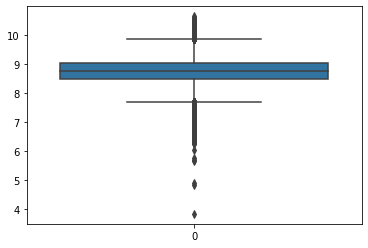

In [60]:
#checking outliers in sales
sns.boxplot(df1['Sales'])

In [61]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [62]:
# defining new variable after removing outliers
df1= remove_outlier(df1, 'Sales')

<Axes: >

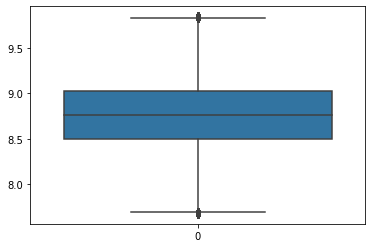

In [63]:
#afer removing the outlier, ploting the box plot
sns.boxplot(df1['Sales'])

In [64]:
#one hot encoding
df_new = pd.get_dummies(df1,columns=['StoreType','Assortment'])
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,CompetitionOpen,Promo2Open,Promo2running,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,8.568456,555,1,0,1,1270.0,0,...,82.0,0.000000,0,0,0,1,0,1,0,0
1,2,5,2015-07-31,8.710125,625,1,0,1,570.0,1,...,92.0,64.142466,1,1,0,0,0,1,0,0
2,3,5,2015-07-31,9.025696,821,1,0,1,14130.0,1,...,103.0,51.912329,1,1,0,0,0,1,0,0
3,4,5,2015-07-31,9.546455,1498,1,0,1,620.0,0,...,70.0,0.000000,0,0,0,1,0,0,0,1
4,5,5,2015-07-31,8.480944,559,1,0,1,29910.0,0,...,3.0,0.000000,0,1,0,0,0,1,0,0


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

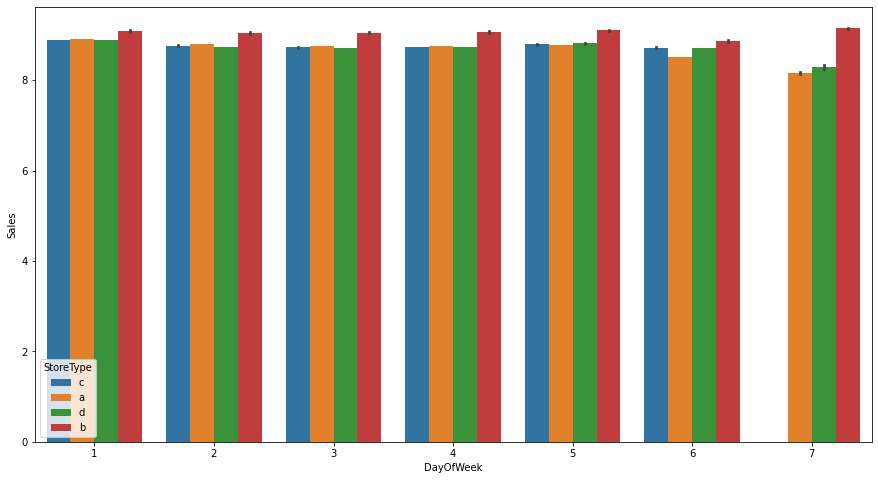

In [65]:
#let's explore store type and Day Of week
plt.figure(figsize=(15,8))
sns.barplot(x=df_new['DayOfWeek'],y=df_new["Sales"],hue=df1['StoreType'])

**Ovservation**
Store type b have maximum sales every day

In [66]:
#Setting the sales column at  last column
columns=list(df_new.columns)
columns.remove('Sales')
columns.append('Sales')
df_new=df_new[columns]
     

In [67]:
#droping some unnecessary colunms becoz these column doesnt make good correletion with sales ,we see earlier also
df_new=df_new.drop(['Store','Date','Year'] , axis = 1)

In [68]:
df_new=df_new.copy()

In [ ]:
df_new.head(1)

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Month,Day,WeekOfYear,...,Promo2Open,Promo2running,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Sales
0,5,555,1,0,1,1270.0,0,7,31,31,...,0.0,0,0,0,1,0,1,0,0,8.568456


## **Model Building**


**Setting Features and Target Variable**

In [69]:
X = df_new.drop(['Sales'] , axis = 1)
y= df_new['Sales']

**Splitting Dataset Into Training Set and Test Set**

In [70]:

X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(664377, 20)
(166095, 20)


In [71]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Implementing Supervised Machine Learning algorithms:**
1. **Linear Regression** (OLS)

In [72]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
regressor.intercept_

-1817511042996.8118

In [74]:
regressor.coef_

array([-2.66287999e-02,  4.36724143e+00,  1.86211432e-01,  2.45559095e-02,
        6.12585548e-03,  2.57291240e-01,  2.71300417e-03,  4.16342237e-02,
        2.93313919e-04, -1.23093845e-02,  1.15220441e-01,  1.01878326e-01,
       -4.06336795e-03, -5.82544934e+10, -5.82544934e+10, -5.82544934e+10,
       -5.82544934e+10,  1.87576554e+12,  1.87576554e+12,  1.87576554e+12])

In [75]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']
     


In [76]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)


  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]
     

In [77]:
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)
     

In [78]:
#linear regression evaluation
regression = model_evaluation('Linear Regressor',regressor,X_train,y_train,X_test,y_test)

The Mean Absolute Error for the validation set is 0.150508
The Mean Squared Error for the validation set is 0.037431
The Root Mean Squared Error for the validation set is 0.193471
The R^2 for the validation set is 0.759503
The Adjusted R^2 for the validation set is 0.759474


In [79]:
#add results to comparison df
add_list_to_final_df(regression)

In [80]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regressor,0.150624,0.037559,0.193803,0.759426,0.759418,0.150508,0.037431,0.193471,0.759503,0.759474


2.**Lasso Regression**

In [88]:
#fitting lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [89]:
lasso.score(X_train, y_train)


0.7593446728612032

In [90]:
lasso_regression = model_evaluation('Lasso Regressor',lasso,X_train,y_train,X_test,y_test)

The Mean Absolute Error for the validation set is 0.15067
The Mean Squared Error for the validation set is 0.037446
The Root Mean Squared Error for the validation set is 0.193509
The R^2 for the validation set is 0.759409
The Adjusted R^2 for the validation set is 0.75938


In [91]:
#add results to comparison df
add_list_to_final_df(lasso_regression)

In [92]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regressor,0.150624,0.037559,0.193803,0.759426,0.759418,0.150508,0.037431,0.193471,0.759503,0.759474
1,Lasso Regressor,0.150774,0.037572,0.193835,0.759345,0.759337,0.150670,0.037446,0.193509,0.759409,0.759380


3.**ElasticNet Regression**

In [93]:
#fitting elasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.0001, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.0001)

In [94]:
elasticnet.score(X_train, y_train)

0.7592801494871607

In [95]:
ElasticNet_regression = model_evaluation('Elasticnet Regressor',elasticnet,X_train,y_train,X_test,y_test)

The Mean Absolute Error for the validation set is 0.15081
The Mean Squared Error for the validation set is 0.037454
The Root Mean Squared Error for the validation set is 0.193531
The R^2 for the validation set is 0.759355
The Adjusted R^2 for the validation set is 0.759326


In [96]:
#add results to comparison df
add_list_to_final_df(ElasticNet_regression)

In [97]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regressor,0.150624,0.037559,0.193803,0.759426,0.759418,0.150508,0.037431,0.193471,0.759503,0.759474
1,Lasso Regressor,0.150774,0.037572,0.193835,0.759345,0.759337,0.150670,0.037446,0.193509,0.759409,0.759380
2,Elasticnet Regressor,0.150918,0.037582,0.193861,0.759280,0.759273,0.150810,0.037454,0.193531,0.759355,0.759326


4.**Decision Tree**

In [83]:
#fitting decision tree
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)
     

DecisionTreeRegressor(random_state=42)

In [84]:
#decision tree evaluation
decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)
     

The Mean Absolute Error for the validation set is 0.070604
The Mean Squared Error for the validation set is 0.00936
The Root Mean Squared Error for the validation set is 0.096746
The R^2 for the validation set is 0.939863
The Adjusted R^2 for the validation set is 0.939856


In [98]:
#add results to comparison df
add_list_to_final_df(decision_tree)
     

In [99]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regressor,0.150624,0.037559,0.193803,0.759426,0.759418,0.150508,0.037431,0.193471,0.759503,0.759474
1,Lasso Regressor,0.150774,0.037572,0.193835,0.759345,0.759337,0.150670,0.037446,0.193509,0.759409,0.759380
2,Elasticnet Regressor,0.150918,0.037582,0.193861,0.759280,0.759273,0.150810,0.037454,0.193531,0.759355,0.759326
3,Decision Tree Regressor,0.000001,0.000000,0.000428,0.999999,0.999999,0.070604,0.009360,0.096746,0.939863,0.939856


5.**Decision Tree With Hyper Parameter Tuning**

In [85]:
#another script that takes toooo long, to find the right parameters for tree
dt_basic = DecisionTreeRegressor()

params = {
          'min_samples_split':[2,3,5,7],
          'min_samples_leaf':[6,8,10],
          }

grid = GridSearchCV(dt_basic,params,verbose=True,cv=10)
 #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


{'min_samples_leaf': 6, 'min_samples_split': 2}

In [86]:
#fitting decision tree
tree = DecisionTreeRegressor(min_samples_leaf=6,min_samples_split=2)
tree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=6)

In [87]:
#decision tree evaluation
decision_tree_tunning = model_evaluation('Decision Tree Regressor hyperparameter Tunning',tree,X_train,y_train,X_test,y_test)
     

The Mean Absolute Error for the validation set is 0.063725
The Mean Squared Error for the validation set is 0.00763
The Root Mean Squared Error for the validation set is 0.087351
The R^2 for the validation set is 0.950975
The Adjusted R^2 for the validation set is 0.950969


In [100]:
#add results to comparison df
add_list_to_final_df(decision_tree_tunning)
     

In [101]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regressor,0.150624,0.037559,0.193803,0.759426,0.759418,0.150508,0.037431,0.193471,0.759503,0.759474
1,Lasso Regressor,0.150774,0.037572,0.193835,0.759345,0.759337,0.150670,0.037446,0.193509,0.759409,0.759380
2,Elasticnet Regressor,0.150918,0.037582,0.193861,0.759280,0.759273,0.150810,0.037454,0.193531,0.759355,0.759326
3,Decision Tree Regressor,0.000001,0.000000,0.000428,0.999999,0.999999,0.070604,0.009360,0.096746,0.939863,0.939856
4,Decision Tree Regressor hyperparameter Tunning,0.041487,0.003252,0.057026,0.979171,0.979170,0.063725,0.007630,0.087351,0.950975,0.950969


6.**Random forest Regressor**

In [ ]:
# fitting 
random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
random_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#model evaluation 
random_f = model_evaluation('Random Forest Regressor',random_forest,X_train,y_train,X_test,y_test)

The Mean Absolute Error for the validation set is 0.050444
The Mean Squared Error for the validation set is 0.004612
The Root Mean Squared Error for the validation set is 0.067913
The R^2 for the validation set is 0.970366
The Adjusted R^2 for the validation set is 0.970363


In [ ]:
#add results to comparison df
add_list_to_final_df(random_f)
     

In [ ]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regressor,0.150624,0.037559,0.193803,0.759426,0.759418,0.150508,0.037431,0.193471,0.759503,0.759474
1,Lasso Regressor,0.150774,0.037572,0.193835,0.759345,0.759337,0.150670,0.037446,0.193509,0.759409,0.759380
2,Elasticnet Regressor,0.150918,0.037582,0.193861,0.759280,0.759273,0.150810,0.037454,0.193531,0.759355,0.759326
3,Decision Tree Regressorhyperparameter,0.041487,0.003252,0.057026,0.979171,0.979170,0.063724,0.007629,0.087343,0.950984,0.950978
4,Decision Tree Regressorhyperparameter,0.041487,0.003252,0.057026,0.979171,0.979170,0.063724,0.007629,0.087343,0.950984,0.950978
5,Random Forest Regressor,0.018798,0.000652,0.025531,0.995825,0.995825,0.050444,0.004612,0.067913,0.970366,0.970363


In [ ]:
# Create model
rf_tuned = RandomForestRegressor()
     

**After fitting random forestRegression colab is crashing ,due to lack of RAM. 

7.**Random Forest with Hyperparameter Tuning**

In [ ]:
#import
from sklearn.model_selection import RandomizedSearchCV
#grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [100, 130, 150]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)

#fitting
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 4.6min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 4.5min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 4.6min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.8min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.8min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.8min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [100, 130, 150]},
                   random_state=42, verbose=2)

In [ ]:
#best para
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [81]:
rfh = RandomForestRegressor(n_estimators=100,min_samples_split=2, min_samples_leaf=1,max_features='auto',max_depth=None,bootstrap=True)
rfh_reg = rfh.fit(X_train, y_train)

In [82]:
#model evaluation 
random_fh = model_evaluation('Random Forest Regressor hyperparameter tuning',rfh_reg,X_train,y_train,X_test,y_test)

The Mean Absolute Error for the validation set is 0.050433
The Mean Squared Error for the validation set is 0.004611
The Root Mean Squared Error for the validation set is 0.067902
The R^2 for the validation set is 0.970376
The Adjusted R^2 for the validation set is 0.970372


In [103]:
#add results to comparison df
add_list_to_final_df(random_fh)

In [104]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regressor,0.150624,0.037559,0.193803,0.759426,0.759418,0.150508,0.037431,0.193471,0.759503,0.759474
1,Lasso Regressor,0.150774,0.037572,0.193835,0.759345,0.759337,0.150670,0.037446,0.193509,0.759409,0.759380
2,Elasticnet Regressor,0.150918,0.037582,0.193861,0.759280,0.759273,0.150810,0.037454,0.193531,0.759355,0.759326
3,Decision Tree Regressor,0.000001,0.000000,0.000428,0.999999,0.999999,0.070604,0.009360,0.096746,0.939863,0.939856
4,Decision Tree Regressor hyperparameter Tunning,0.041487,0.003252,0.057026,0.979171,0.979170,0.063725,0.007630,0.087351,0.950975,0.950969
5,Random Forest Regressor hyperparameter tuning,0.018798,0.000653,0.025546,0.995820,0.995820,0.050433,0.004611,0.067902,0.970376,0.970372


Observation

The maximum R^2 was seen in  Random Forest hyperparameter tuning model with the value 0.970376 which was only slighly improved from a simple random forest model.
It seems like we have maxed out on performance with the data and these models.

# **Feature Importance**

<Axes: xlabel='Importance', ylabel='Variable'>

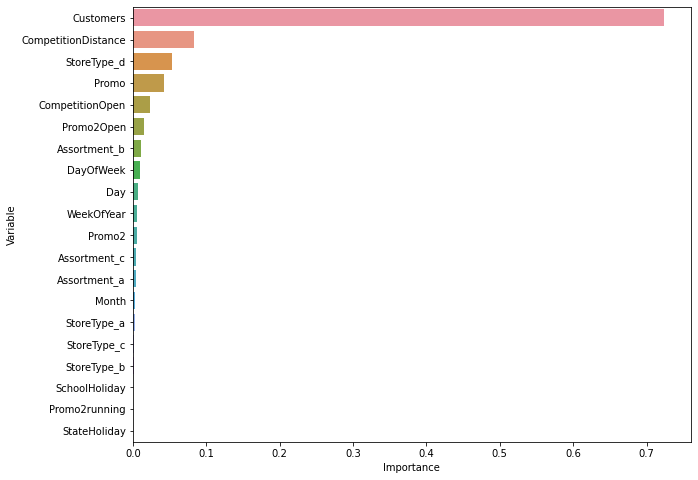

In [121]:
#visualising feature importance of Random forest Regressor Tunning
plt.figure(figsize=(10,8))
feature_imp = pd.DataFrame({"Variable": X.columns,"Importance": rfh_reg.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])
     

# Ovservation
Customers, CompetitionDistance, StoreType_d, Promo these four are most important features in  sales prediction.

# **Conclusion and Recommendations**
**Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:

* There were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.

* The positive effect of promotion on Customers and Sales is observable.
Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.

* Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.

Random Forest Tuned Model gave the best results and only slightly improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.

**Recommendations**

More stores should be encouraged for promotion.

Store type B should be increased in number.

There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.